# **IBM Data Science Professional Certificate**

Course 6: Databases and SQL for Data Science with Python

## *Installing & testing SQL*

In [1]:
# install SQL module
#!pip install ipython-sql

In [2]:
# imports
import pandas as pd

In [1]:
# load SQL module
%load_ext sql

In [2]:
# connect to sqlite database
%sql sqlite://

In [5]:
%%sql
-- # create test table
-- # note that in SQL, comments are indicated with /* */ or double dash --
-- # To use SQL in a cell, first write %%sql

CREATE TABLE sales
(
    key       varchar(6),
    ts        timestamp,
    product   integer,
    completed boolean,
    price     float
);
INSERT INTO sales
VALUES ('sale_1', '2019-11-08 00:00', 0, TRUE, 1.1),
       ('sale_2', '2019-11-08 01:00', 0, FALSE, 1.2),
       ('sale_3', '2019-11-08 01:00', 0, TRUE, 1.3),
       ('sale_4', '2019-11-08 01:00', 1, FALSE, 1.4),
       ('sale_5', '2019-11-08 02:00', 1, TRUE, 1.5),
       ('sale_6', '2019-11-08 02:00', 1, TRUE, 1.5);

 * sqlite://
Done.
6 rows affected.


[]

In [6]:
%%sql
-- # query the database
select * from sales;

 * sqlite://
Done.


key,ts,product,completed,price
sale_1,2019-11-08 00:00,0,1,1.1
sale_2,2019-11-08 01:00,0,0,1.2
sale_3,2019-11-08 01:00,0,1,1.3
sale_4,2019-11-08 01:00,1,0,1.4
sale_5,2019-11-08 02:00,1,1,1.5
sale_6,2019-11-08 02:00,1,1,1.5


In [7]:
#set the previous output of a cell to a variable
result = _

In [8]:
type(result)

sql.run.ResultSet

In [9]:
# convert the resultset into a dataframe
df = result.DataFrame()

In [10]:
# view dataframe
df

,key,ts,product,completed,price
0,sale_1,2019-11-08 00:00,0,1,1.1
1,sale_2,2019-11-08 01:00,0,0,1.2
2,sale_3,2019-11-08 01:00,0,1,1.3
3,sale_4,2019-11-08 01:00,1,0,1.4
4,sale_5,2019-11-08 02:00,1,1,1.5
5,sale_6,2019-11-08 02:00,1,1,1.5


<AxesSubplot:>

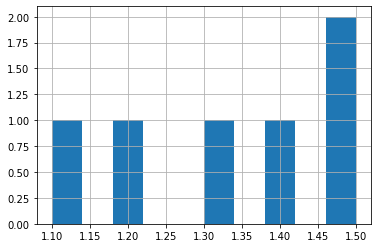

In [11]:
# play with dataframe
df.price.hist()

## *Week 1: Getting Started with SQL*

SQL:
- Structured Query Language
- One of the top three skills a data scientist needs.
- A powerful language used for communicating with or querying relational databases.

*note: it is good practice to use a semicolon to mark the end of a SQL statement*

### Data Types

SQL data types come in three major forms:
- String
- Numeric
- Date & Time

Common String Data Types:
- **CHAR(n)**: fixed length string of letters, numbers, and special characters from 0-255 in length.

- **VARCHAR(n)**: variable length string of letters, numbers, and special characters. N specifies the max column length in characters between 0 to 65535.

- **BINARY(n)**: equal to CHAR(), but stores binary byte strings.

- **TEXT(n)**: holds a string with max length of 65535 bytes.

Common Numeric Data Types:

- **INT(n)**: Medium integer with signed range from -+2147483648. The size parameter specifies the maximum display width, up to 255. 

- **FLOAT(n, d)**: A floating point / decimal number.  The number of digits after the decimal is specified by parameter d while n indicates the total number of digits. 

- **BIT(n)**: Uses 1 bit to store value 0, 1, or NULL.  Commonly used to store info if the data in the related record is still valid.

- **BOOL**: 0 = False, 1 = True

Common Date & Time Data Types:
- **DATE**: yyyy-mm-dd

- **DATETIME(fsp)**: yyyy-mm-dd hh:mm:ss . Adding DEFAULT and ON UPDATE in the column definition provides automatic initialization and updating to the current date and time.

- **TIMESTAMP**: yyyy-mm-dd hh:mm:ss.  The timestamp values are stored as the number of seconds since the Unix epoch.  You can implement automatic initialization and updating with DEFAULT CURRENT_TIMESTAMP and ON UPDATE CURRENT_TIMESTAMP.

### Databases
Database:
- a repository of data
- provides functionality for adding, modifying, and querying data
- different kinds of databases store data in different forms (relational, hierarchical, noSQL, etc)
- DBMS: database management system (software that manages databases)
- database, database server, database system, data server, DBMS - often are used interchangeably.

Relational Database:
- data stored in tabular form (columns and rows)
- tables are collections of related things
- relationships can exist between tables
- RDBMS: relational database management system
- RDBMS is a set of software tools that control data (access, organization, and storage).
- Examples of RDBMS: mysql, oracle, IBM Db2, etc

Basic SQL commands:
- Create a table
- insert 
- select
- update
- delete

SQL statements fall into two categories:
- DDL
- DML

### SELECT Statement

SELECT:
- used to retrieve data from a database table using the SELECT statement
- is a Data Manipulation Language (DML) statement used to read and modify data.
- The select statement is a query and the output is a result set/result table.
- use asterisk * to retrieve all columns of a table, or specify which ones you want.

- *SELECT * from table_name*

- *SELECT col1, col2 from table_name*

### WHERE Clause

WHERE:
- restricts the result set
- requires a predicate (WHERE "predicate") which evaluates to True, False, or Unknown.

WHERE operators:
- = 
- *>*
- *>=*
- *<*
- *<=*
- <> (not equal to)

- *SELECT * from table_name WHERE col1 = 'a'*

### Useful Expressions

Count():
- a built in function that retrieves the number of rows matching the query criteria.
- *SELECT COUNT(col2) from table_name WHERE col2 = 'name';*
- *SELECT COUNT( * ) from table_name;*

Distinct:
- used to remove duplicate values from a result set.
- *SELECT DISTINCT col1 FROM table_name WHERE col2 = 'criteria';*

Limit:
- used to restrict the number of rows retrieved from the database.
- You can choose where to start grabbing the rows by using OFFSET
- *SELECT * from table_name LIMIT 10*
- *SELECT * from table_name LIMIT 10 OFFSET 15* (start at row 16)

Examples:
- *SELECT COUNT(DISTINCT ReleaseYear) from FilmLocations WHERE ProductionCompany = 'Warner Bros. Pictures';*
- *SELECT DISTINCT Title FROM FilmLocations WHERE ReleaseYear = 2015 LIMIT 10;*

### INSERT Statement

INSERT:
- Once a table is created, it can be populated with data using an insert statement.
- Insert is a DML statement.
- *INSERT INTO table_name (col1, col2, col3) VALUES ('A', 'B', 'C');*
- Multiple values can be inserted using one insert statement
- *INSERT INTO table_name (col1, col2, col3) VALUES('A', 'B', 'C') ('X', 'Y', 'Z');

*NOTE: it is important that the number of values matches the number of columns specified in the column list*

### UPDATE Statement
- Once a table is created and data inserted into it, the data can be altered using an update statement.
- Update is a DML statement
- *UPDATE table_name SET col1 = 'value' WHERE condition;*

### DELETE statement
- Use a delete statement to remove 1 or more rows from a table
- Delete is a DML statement.
- *DELETE from table_name WHERE condition;*

*NOTE: when using SQl in jupyter labs, sometimes the code cells won't run if you have --comment in it.*

In [12]:
%%sql
-- create test table
CREATE TABLE authors
(
    ID       varchar(6),
    LastName  varchar(15),
    FirstName varchar(15),
    City varchar(15)
);

 * sqlite://
Done.


[]

In [13]:
%%sql
-- insert data into table

INSERT INTO authors
VALUES ('A1', 'Chong', 'Raul', 'Toronto'),
       ('A2', 'Ahuja', 'Rav', 'Toronto'),
       ('A3', 'Hakes', 'Ian', 'Toronto'),
       ('A4', 'Sharma', 'Neeraj', 'Chennai'),
       ('A5', 'Perniu', 'Liv', 'New York');

 * sqlite://
Done.


[]

In [14]:
%%sql
SELECT * FROM authors;

 * sqlite://
Done.


ID,LastName,FirstName,City
A1,Chong,Raul,Toronto
A2,Ahuja,Rav,Toronto
A3,Hakes,Ian,Toronto
A4,Sharma,Neeraj,Chennai
A5,Perniu,Liv,New York


In [15]:
%%sql 

UPDATE authors
SET FirstName = 'Katie', LastName = 'Brown'
WHERE ID = 'A3';

 * sqlite://
1 rows affected.


[]

In [16]:
%%sql

SELECT * FROM authors;

 * sqlite://
Done.


ID,LastName,FirstName,City
A1,Chong,Raul,Toronto
A2,Ahuja,Rav,Toronto
A3,Brown,Katie,Toronto
A4,Sharma,Neeraj,Chennai
A5,Perniu,Liv,New York


In [17]:
%%sql

DELETE FROM authors WHERE ID IN ('A4', 'A5')

 * sqlite://
2 rows affected.


[]

In [18]:
%%sql

SELECT * FROM authors;

 * sqlite://
Done.


ID,LastName,FirstName,City
A1,Chong,Raul,Toronto
A2,Ahuja,Rav,Toronto
A3,Brown,Katie,Toronto


## *Week 2: Intro to Relational Databases and Tables*

### Relational Model

Relational Model:

- The most used data model for databases.
- Allows for data independence (logical data independence, physical data indepedence, physical storage independence).
- Data is stored in tables.

### Entity-Relationship Model

E.R. Model:
- Used as a tool to design relational databases
- Made up of entities and attributes. 

Entities:
- Some sort of noun, like a person, place, or object. 
- Entities are tables in a database ('books')
- in an ER Diagram, these are drawn as rectangles with the associated attributes connected by lines and ovals.

Attributes:
- Data elements that characterize the associated entity.
- These are the columns in a database table ('authors', 'Title', etc)
- In an ER diagram, these are drawn as ovals that are connected by lines to their associated entity.

### Primary Keys

Primary keys:
- Each table / entity is assigned a primary key.
- The primary key of a table uniquely identifies each tuple / row in the table.
- This prevents the duplication of data and provides a way to define relationships between tables.
- Primary keys cannot have NULL values in them.
- Primary keys can be composite (a key which has more than 1 attribute to uniquely identify a row).

### Foreign Keys

Foreign keys:
- This is a kind of primary key which is defined in one table in order to create a link between that table and other tables.
- The foreign key links to the primary key of another database table, creating a relationship between the tables. 
- A foreign key could potentially relate back to the same table. 
- Foreign keys can have NULL values in them.

### Database Instances on Cloud

Examples of cloud databases:
- IBM Db2
- Databases for PostgreSQL
- Oracle Database Cloud Service
- Microsoft Azure SQL Database
- Amazon Relational Database Services (RDS)

Steps to run a database in cloud:
- First provision an instance of the database service on the cloud platform of your choice. 
- An instance of Database as a Service (DBaaS) provides you with access to the database in cloud without the need to set up hardware, software, or administering the database. 
- The database service instance will hold the data in related tables. 
- Once the data is loaded into the database instance, you can connect to it using a web interface or APIs. 
- Once connected, your application can send SQL statements across to the database instance, where they will be resolved as operations and then returned as a result set. 

Creating a database instance on IBM Db2:
- Navigate to IBM cloud catalog and select Db2 service (lite plan)
- If needed, change the defaults.
- Choose a service instance name, the region to deploy, etc. Then 'Create'. 
- View and manage the service from your IBM dashboard.
- Use 'open console' to launch the web console for the instance.

[IBM cloud](https://cloud.ibm.com/services)

Access the database instance from applications:
- Get the service credentials of the instance, which are necessary to establish a connection to the database. 
- The credentials include the database name, port number, host name (the name of the server on the cloud in which the database instance resides), username, etc. 

### Data Definition Language Statements

DDL:
- used to define, change, or drop database objects like tables.

Common DDL statements:
- CREATE (create tables & define columns)

- ALTER (altering tables, including adding/dropping columns or modifying datatypes)

- TRUNCATE (delete data in a table, but not the table itself)

- DROP (delete tables)

### Data Manipulation Language Statements

DML:
- used to read and modify data
- CRUD Operations  (Create, Read, Update, Delete rows)

Common DML statements:
- INSERT (insert row(s) into a table)

- SELECT (read / select row(s) from a table)

- UPDATE (edit row(s) in a table)

- DELETE (remove row(s) from a table)

### CREATE TABLE Statement

Create Table Syntax:

CREATE TABLE example_table(

    column_1 datatype optional_parameters,
    
    column_2 datatype,
    
    ...
    
    column_n datatype
    
);

### ALTER Statement

Alter:
- Add or remove columns from a table
- Modify data type of columns
- add or remove keys
- add or remove constraints
- Each row of the statement is one change that you want to make 

Syntax:

ALTER TABLE example_table 

    ADD COLUMN column3 datatype,
    
    DROP COLUMN column2,
    
    ALTER COLUMN column1 SET DATA TYPE datatype,
    
    RENAME COLUMN column6 TO column7
    
    ADD FOREIGN KEY(column5) REFERENCES tablename(column2) ON DELETE SET NULL;

### DROP Statement

Drop: 
- Use DROP TABLE statement to delete a table from the database.
- Use DROP within an alter statement to remove columns.

Syntax:

DROP TABLE table_name;

### TRUNCATE Statement

Truncate:
- Delete data within a table, but not the table itself.
- You can use a DELETE statement without a  WHERE clause to accomplish the same action, it's generally quicker to use TRUNCATE.

Syntax:

TRUNCATE TABLE table_name

    IMMEDIATE;
    
*NOTE: the immediate specifies that this action should be completed immediately and cannot be undone.*

In [3]:
# load SQL module
%load_ext sql

In [4]:
# connect to sqlite database
%sql sqlite://

In [21]:
%%sql
CREATE TABLE author(
    author_id CHAR(2) PRIMARY KEY NOT NULL,
    lastname VARCHAR(15) NOT NULL,
    firstname VARCHAR(15) NOT NULL,
    email VARCHAR(40),
    city VARCHAR(15),
    country char(2)
);

 * sqlite://
Done.


[]

In [22]:
%%sql
SELECT * FROM author;

 * sqlite://
Done.


author_id,lastname,firstname,email,city,country


In [23]:
%%sql
DROP TABLE author;

 * sqlite://
Done.


[]

**Practice Lab:**
Create two tables, petsale and pet:

In [25]:
%%sql
CREATE TABLE PETSALE (
    ID INTEGER NOT NULL,
    PET CHAR(20),
    SALEPRICE DECIMAL(6,2),
    PROFIT DECIMAL(6,2),
    SALEDATE DATE
    );

 * sqlite://
Done.


[]

In [25]:
%%sql
CREATE TABLE PET (
    ID INTEGER NOT NULL,
    ANIMAL VARCHAR(20),
    QUANTITY INTEGER
    );

 * sqlite://
Done.


[]

Insert data into the new tables and view the tables:

In [26]:
%%sql
INSERT INTO PETSALE VALUES
    (1,'Cat',450.09,100.47,'2018-05-29'),
    (2,'Dog',666.66,150.76,'2018-06-01'),
    (3,'Parrot',50.00,8.9,'2018-06-04'),
    (4,'Hamster',60.60,12,'2018-06-11'),
    (5,'Goldfish',48.48,3.5,'2018-06-14');

 * sqlite://
5 rows affected.


[]

In [27]:
%%sql
SELECT * FROM PETSALE;

 * sqlite://
Done.


ID,PET,SALEPRICE,PROFIT,SALEDATE
1,Cat,450.09,100.47,2018-05-29
2,Dog,666.66,150.76,2018-06-01
3,Parrot,50,8.9,2018-06-04
4,Hamster,60.6,12,2018-06-11
5,Goldfish,48.48,3.5,2018-06-14


In [28]:
%%sql
INSERT INTO PET VALUES
    (1,'Cat',3),
    (2,'Dog',4),
    (3,'Hamster',2);

 * sqlite://
3 rows affected.


[]

In [29]:
%%sql
SELECT * FROM PET;

 * sqlite://
Done.


ID,ANIMAL,QUANTITY
1,Cat,3
2,Dog,4
3,Hamster,2


Alter the tables:

In [30]:
%%sql
ALTER TABLE PETSALE
ADD COLUMN QUANTITY INTEGER;

 * sqlite://
Done.


[]

In [31]:
%%sql
SELECT * FROM PETSALE;

 * sqlite://
Done.


ID,PET,SALEPRICE,PROFIT,SALEDATE,QUANTITY
1,Cat,450.09,100.47,2018-05-29,None
2,Dog,666.66,150.76,2018-06-01,None
3,Parrot,50,8.9,2018-06-04,None
4,Hamster,60.6,12,2018-06-11,None
5,Goldfish,48.48,3.5,2018-06-14,None


add data into the newly created column:

In [32]:
%%sql
UPDATE PETSALE SET QUANTITY = 9 WHERE ID = 1;
UPDATE PETSALE SET QUANTITY = 3 WHERE ID = 2;
UPDATE PETSALE SET QUANTITY = 2 WHERE ID = 3;
UPDATE PETSALE SET QUANTITY = 6 WHERE ID = 4;
UPDATE PETSALE SET QUANTITY = 24 WHERE ID = 5;

 * sqlite://
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [33]:
%%sql
SELECT * FROM PETSALE;

 * sqlite://
Done.


ID,PET,SALEPRICE,PROFIT,SALEDATE,QUANTITY
1,Cat,450.09,100.47,2018-05-29,9
2,Dog,666.66,150.76,2018-06-01,3
3,Parrot,50,8.9,2018-06-04,2
4,Hamster,60.6,12,2018-06-11,6
5,Goldfish,48.48,3.5,2018-06-14,24


In [34]:
%%sql
ALTER TABLE PETSALE
    DROP COLUMN PROFIT;

 * sqlite://
(sqlite3.OperationalError) near "DROP": syntax error
[SQL: ALTER TABLE PETSALE DROP COLUMN PROFIT;]
(Background on this error at: http://sqlalche.me/e/e3q8)


*NOTE: SQLite does not support dropping or altering columns. Instead, you need to copy the data per the link below:*

[SQLite tutorials](https://www.sqlitetutorial.net/sqlite-alter-table/)

In [35]:
%%sql
SELECT * FROM PETSALE;

 * sqlite://
Done.


ID,PET,SALEPRICE,PROFIT,SALEDATE,QUANTITY
1,Cat,450.09,100.47,2018-05-29,9
2,Dog,666.66,150.76,2018-06-01,3
3,Parrot,50,8.9,2018-06-04,2
4,Hamster,60.6,12,2018-06-11,6
5,Goldfish,48.48,3.5,2018-06-14,24


In [36]:
%%sql
ALTER TABLE PETSALE
ALTER COLUMN PET SET DATA TYPE VARCHAR(20);

 * sqlite://
(sqlite3.OperationalError) near "ALTER": syntax error
[SQL: ALTER TABLE PETSALE ALTER COLUMN PET SET DATA TYPE VARCHAR(20);]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [37]:
%%sql
SELECT * FROM PETSALE;

 * sqlite://
Done.


ID,PET,SALEPRICE,PROFIT,SALEDATE,QUANTITY
1,Cat,450.09,100.47,2018-05-29,9
2,Dog,666.66,150.76,2018-06-01,3
3,Parrot,50,8.9,2018-06-04,2
4,Hamster,60.6,12,2018-06-11,6
5,Goldfish,48.48,3.5,2018-06-14,24


In [38]:
%%sql
ALTER TABLE PETSALE
RENAME COLUMN PET TO ANIMAL;

 * sqlite://
Done.


1


In [39]:
%%sql
SELECT * FROM PETSALE;

 * sqlite://
Done.


ID,ANIMAL,SALEPRICE,PROFIT,SALEDATE,QUANTITY
1,Cat,450.09,100.47,2018-05-29,9
2,Dog,666.66,150.76,2018-06-01,3
3,Parrot,50,8.9,2018-06-04,2
4,Hamster,60.6,12,2018-06-11,6
5,Goldfish,48.48,3.5,2018-06-14,24


Truncate a table:

*NOTE: SQLite does not have a truncate statement. Instead, use DELETE FROM table_name;*

In [40]:
%%sql
DELETE FROM PET;

 * sqlite://
3 rows affected.


[]

In [41]:
%%sql
SELECT * FROM PET;

 * sqlite://
Done.


ID,ANIMAL,QUANTITY


Drop a table:

In [42]:
%%sql
DROP TABLE pet;

 * sqlite://
Done.


[]

**SQL lab**

Create the Tables:

In [3]:
%%sql
CREATE TABLE EMPLOYEES (
                          EMP_ID CHAR(9) NOT NULL,
                          F_NAME VARCHAR(15) NOT NULL,
                          L_NAME VARCHAR(15) NOT NULL,
                          SSN CHAR(9),
                          B_DATE DATE,
                          SEX CHAR,
                          ADDRESS VARCHAR(30),
                          JOB_ID CHAR(9),
                          SALARY DECIMAL(10,2),
                          MANAGER_ID CHAR(9),
                          DEP_ID CHAR(9) NOT NULL,
                          PRIMARY KEY (EMP_ID)
                        );

 * sqlite://
Done.


[]

In [4]:
%%sql
CREATE TABLE JOB_HISTORY (
                            EMPL_ID CHAR(9) NOT NULL,
                            START_DATE DATE,
                            JOBS_ID CHAR(9) NOT NULL,
                            DEPT_ID CHAR(9),
                            PRIMARY KEY (EMPL_ID,JOBS_ID)
                          );

 * sqlite://
Done.


[]

In [5]:
%%sql
CREATE TABLE JOBS (
                    JOB_IDENT CHAR(9) NOT NULL,
                    JOB_TITLE VARCHAR(15) ,
                    MIN_SALARY DECIMAL(10,2),
                    MAX_SALARY DECIMAL(10,2),
                    PRIMARY KEY (JOB_IDENT)
                  );

 * sqlite://
Done.


[]

In [6]:
%%sql
CREATE TABLE DEPARTMENTS (
                            DEPT_ID_DEP CHAR(9) NOT NULL,
                            DEP_NAME VARCHAR(15) ,
                            MANAGER_ID CHAR(9),
                            LOC_ID CHAR(9),
                            PRIMARY KEY (DEPT_ID_DEP)
                          );

 * sqlite://
Done.


[]

In [7]:
%%sql
CREATE TABLE LOCATIONS (
                          LOCT_ID CHAR(9) NOT NULL,
                          DEP_ID_LOC CHAR(9) NOT NULL,
                          PRIMARY KEY (LOCT_ID,DEP_ID_LOC)
                        );

 * sqlite://
Done.


[]

Load data into the tables:

In [8]:
%%sql

INSERT INTO DEPARTMENTS VALUES
    (2, 'Architect Group', 30001, 'L0001'),
    (5, 'Software Group', 30002, 'L0002'),
    (7, 'Design Team', 30003, 'L0003');

 * sqlite://
3 rows affected.


[]

In [49]:
%%sql
SELECT * FROM DEPARTMENTS

 * sqlite://
Done.


DEPT_ID_DEP,DEP_NAME,MANAGER_ID,LOC_ID
2,Architect Group,30001,L0001
5,Software Group,30002,L0002
7,Design Team,30003,L0003


In [9]:
%%sql

INSERT INTO EMPLOYEES VALUES
    ("E1001", 'John', 'Thomas', 123456, '1/9/1976', 'M', '5631 Rice, OakPark,IL', 100,100000, 30001, 2),
    ("E1002", 'Alice', 'James', 123457, '7/31/1972', 'F', '980 Berry ln, Elgin,IL', 200, 80000, 30002, 5),
    ("E1003", 'Steve', 'Wells', 123458, '8/10/1980', 'M', '291 Springs, Gary,IL', 300,50000, 30002, 5),
    ("E1004", 'Santosh', 'Kumar', 123459, '7/20/1985', 'M', '511 Aurora Av, Aurora,IL', 400, 60000, 30004, 5),
    ("E1005", 'Ahmed', 'Hussain', 123410, '1/4/1981', 'M', '216 Oak Tree, Geneva,IL', 500,70000, 30001, 2),
    ("E1006", 'Nancy', 'Allen', 123411, '2/6/1978', 'F', '111 Green Pl, Elgin,IL', 600, 90000, 30001, 2),
    ("E1007", 'Mary', 'Thomas', 123412, '5/5/1975', 'F', '100 Rose Pl, Gary,IL', 650,65000, 30003, 7),
    ("E1008", 'Bharath', 'Gupta', 123413, '5/6/1985', 'M', '145 Berry Ln, Naperville,IL', 660, 65000, 30003, 7),
    ("E1009", 'Andrea', 'Jones', 123414, '7/9/1990', 'F', '120 Fall Creek, Gary,IL', 234,70000, 30003, 7),
    ("E1010", 'Ann', 'Jacob', 123415, '3/30/1982', 'F', '111 Britany Springs,Elgin,IL', 220, 70000, 30004, 5);

 * sqlite://
10 rows affected.


[]

In [51]:
%%sql
SELECT * FROM EMPLOYEES;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
E1005,Ahmed,Hussain,123410,1/4/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,2/6/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,7/9/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
E1010,Ann,Jacob,123415,3/30/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [10]:
%%sql

INSERT INTO JOBS VALUES
    (100, 'Sr. Architect', 60000, 100000),
    (200, 'Sr. Software Developer', 60000, 80000),
    (300, 'Jr. Software Developer', 40000, 60000),
    (400, 'Jr. Software Developer', 40000, 60000),
    (500, 'Jr. Architect', 50000, 70000),
    (600, 'Lead Architect', 70000, 100000),
    (650, 'Jr. Designer', 60000, 70000),
    (660, 'Jr. Designer', 60000, 70000),
    (234, 'Sr. Designer', 70000, 90000),
    (220, 'Sr. Designer', 70000, 90000);

 * sqlite://
10 rows affected.


[]

In [53]:
%%sql
SELECT * FROM JOBS;

 * sqlite://
Done.


JOB_IDENT,JOB_TITLE,MIN_SALARY,MAX_SALARY
100,Sr. Architect,60000,100000
200,Sr. Software Developer,60000,80000
300,Jr. Software Developer,40000,60000
400,Jr. Software Developer,40000,60000
500,Jr. Architect,50000,70000
600,Lead Architect,70000,100000
650,Jr. Designer,60000,70000
660,Jr. Designer,60000,70000
234,Sr. Designer,70000,90000
220,Sr. Designer,70000,90000


In [11]:
%%sql

INSERT INTO LOCATIONS VALUES
    ('L0001', 2),
    ('L0002', 5),
    ('L0003', 7);

 * sqlite://
3 rows affected.


[]

In [55]:
%%sql
SELECT * FROM LOCATIONS;

 * sqlite://
Done.


LOCT_ID,DEP_ID_LOC
L0001,2
L0002,5
L0003,7


In [12]:
%%sql

INSERT INTO JOB_HISTORY VALUES
    ('E1001', '8/1/2000', 100, 2),
    ('E1002', '8/1/2001', 200, 5),
    ('E1003', '8/16/2001', 300, 5),
    ('E1004', '8/16/2000', 400, 5),
    ('E1005', '5/30/2000', 500, 2),
    ('E1006', '8/16/2001', 600, 2),
    ('E1007', '5/30/2002', 650, 7),
    ('E1008', '5/6/2010', 660, 7),
    ('E1009', '8/16/2016', 234, 7),
    ('E1010', '8/16/2016', 220, 5);

 * sqlite://
10 rows affected.


[]

In [57]:
%%sql
SELECT * FROM JOB_HISTORY;

 * sqlite://
Done.


EMPL_ID,START_DATE,JOBS_ID,DEPT_ID
E1001,8/1/2000,100,2
E1002,8/1/2001,200,5
E1003,8/16/2001,300,5
E1004,8/16/2000,400,5
E1005,5/30/2000,500,2
E1006,8/16/2001,600,2
E1007,5/30/2002,650,7
E1008,5/6/2010,660,7
E1009,8/16/2016,234,7
E1010,8/16/2016,220,5


## *Week 3: Intermediate SQL*

### String Patterns & Ranges

When retrieving data from a table, you can:
- Select the entire table (*select * from table;*)
- Select certain columns (*select col1, col3 from table;*)
- Select certain columns & rows that fit a condition (*select col2 from table where col1 = 'True';*)

Use the LIKE predicate with string patterns (*WHERE column_name LIKE string_pattern*) to search for rows that fit that string pattern.

String pattern examples:
- WHERE firstname **LIKE** 'R%'

*NOTE: the % sign indicates that there are missing letters before or after the known letter. This is called a wildcard character, which is used to substitute other characters.*

You can also retrieve data using a range in the where clause:
- *SELECT col1, col2 from table WHERE col2 **BETWEEN** 290 and 300;*
- *SELECT firstname, lastname, country from table WHERE country **IN** ('au', 'br');*

### Sorting Result Sets

Use the ORDER BY clause to sort a result set:
- *SELECT col1 from table **ORDER BY** col1;*
- *SELECT col2 from table **ORDER BY** col2 **DESC**;*
- *SELECT col1, col2 from table **ORDER BY** 2;*  (this orders by column 2)

*NOTE: by default, ORDER BY is in ascending order. You can set it to descending using DESC.*

### Grouping Result Sets

Use the DISTINCT clause to get a result set of unique values & eliminate duplicates:
- *SELECT **DISTINCT(col2)** from table;*

Use the GROUP BY clause to group a result set:
- *SELECT country, count(country) **AS** Count from author **GROUP BY** country;*

Set a restriction to a group by clause using the HAVING clause:
- *SELECT country, count(country) **AS** Count from author **GROUP BY** country **HAVING** count(country) > 4;*

*NOTE: the having clause is used only with the group by clause*.

**Lab:** Use string patterns, ranges, and sets to retrieve employees with an address in Elgin, IL

In [58]:
%%sql
select * from employees;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
E1005,Ahmed,Hussain,123410,1/4/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,2/6/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,7/9/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
E1010,Ann,Jacob,123415,3/30/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [59]:
%%sql

SELECT F_NAME, L_NAME, ADDRESS
FROM EMPLOYEES 
WHERE ADDRESS LIKE '%Elgin,IL';

 * sqlite://
Done.


F_NAME,L_NAME,ADDRESS
Alice,James,"980 Berry ln, Elgin,IL"
Nancy,Allen,"111 Green Pl, Elgin,IL"
Ann,Jacob,"111 Britany Springs,Elgin,IL"


In [60]:
%%sql

SELECT F_NAME , L_NAME, B_DATE
FROM EMPLOYEES
WHERE B_DATE LIKE '%197%';

 * sqlite://
Done.


F_NAME,L_NAME,B_DATE
John,Thomas,1/9/1976
Alice,James,7/31/1972
Nancy,Allen,2/6/1978
Mary,Thomas,5/5/1975


In [61]:
%%sql

SELECT F_NAME, L_NAME, SALARY, DEP_ID
FROM EMPLOYEES
WHERE (SALARY BETWEEN 60000 AND 70000) AND DEP_ID = 5;

 * sqlite://
Done.


F_NAME,L_NAME,SALARY,DEP_ID
Santosh,Kumar,60000,5
Ann,Jacob,70000,5


Now sort results:

In [62]:
%%sql

SELECT F_NAME, L_NAME, DEP_ID
FROM EMPLOYEES
ORDER BY DEP_ID;

 * sqlite://
Done.


F_NAME,L_NAME,DEP_ID
John,Thomas,2
Ahmed,Hussain,2
Nancy,Allen,2
Alice,James,5
Steve,Wells,5
Santosh,Kumar,5
Ann,Jacob,5
Mary,Thomas,7
Bharath,Gupta,7
Andrea,Jones,7


In [63]:
%%sql

SELECT F_NAME, L_NAME, DEP_ID
FROM EMPLOYEES
ORDER BY L_NAME DESC, DEP_ID DESC;

 * sqlite://
Done.


F_NAME,L_NAME,DEP_ID
Steve,Wells,5
Mary,Thomas,7
John,Thomas,2
Santosh,Kumar,5
Andrea,Jones,7
Alice,James,5
Ann,Jacob,5
Ahmed,Hussain,2
Bharath,Gupta,7
Nancy,Allen,2


Select data from multiple tables using aliases and the relationships between the tables:

In [64]:
%%sql

SELECT D.DEP_NAME, E.F_NAME, E.L_NAME
FROM EMPLOYEES AS E, DEPARTMENTS AS D
WHERE E.DEP_ID = D.DEPT_ID_DEP
ORDER BY D.DEP_NAME, E.L_NAME DESC;

 * sqlite://
Done.


DEP_NAME,F_NAME,L_NAME
Architect Group,John,Thomas
Architect Group,Ahmed,Hussain
Architect Group,Nancy,Allen
Design Team,Mary,Thomas
Design Team,Andrea,Jones
Design Team,Bharath,Gupta
Software Group,Steve,Wells
Software Group,Santosh,Kumar
Software Group,Alice,James
Software Group,Ann,Jacob


Use grouping:

In [65]:
%%sql

SELECT DEP_ID, COUNT(*) AS COUNT
FROM EMPLOYEES
GROUP BY DEP_ID;

 * sqlite://
Done.


DEP_ID,COUNT
2,3
5,4
7,3


In [66]:
%%sql

SELECT DEP_ID, COUNT(*) AS NUM_EMPLOYEES, AVG(SALARY) AS AVG_SALARY
FROM EMPLOYEES
GROUP BY DEP_ID HAVING NUM_EMPLOYEES < 4
ORDER BY AVG_SALARY;

 * sqlite://
Done.


DEP_ID,NUM_EMPLOYEES,AVG_SALARY
7,3,66666.66666666667
2,3,86666.66666666667


In [67]:
%%sql

SELECT *
FROM EMPLOYEES
WHERE DEP_ID IN(2,7);

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1005,Ahmed,Hussain,123410,1/4/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,2/6/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,7/9/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7


### Built-in Database Functions

Built-in Functions:
- Most databases come with built-in functions which can be included as part of SQL statements. 
- This can significantly reduce the amount of data that needs to be retrieved and speed up data processing.
- You can also create functions (user-defined functions) that can then be used in the database.

Aggregate Functions:
- Column functions
- Input: collection of values (such as an entire column or subset of a column)
- Output: single value or Null

Examples of Aggregate Functions:
- Sum()
- Min()
- Max()
- Avg()

*NOTE: you can use keyword AS to alias a new name for these output values.*

### Aggregate Functions

Aggregate Functions:
- Column functions
- Input: collection of values (such as an entire column or subset of a column)
- Output: single value or Null

Examples of Aggregate Functions:
- Sum()
- Min()
- Max()
- Avg()

### Scalar and String Functions

Scalar Functions:
- Performs operations on every input value.
- Can be used in the WHERE clause 
     - (*where LCASE(col1) = 'word';*)
- Can be used in conjunction with DISTINCT to get unique values 
    - (*select DISTINCT(UCASE(col1)) from table;*)

String Functions:
- A subgroup of scalar functions that perform operations on string (CHAR, VARCHAR) input values.

Examples of Scalar Functions:
- Round()
- Length()
- Ucase()
- Lcase()

### Date and Time Functions

Most Databases contain special datatypes for date and times:
- Date (YYYY-MM-DD)
- Time (HH:MM:SS)
- Datetime (YYYY-MM-DD HH:MM:SS[zzzzzz])
- Date and time functions can be used in where clauses
    - *where month(col2) = '05';*
- You can use date and time arithmetic:
    - select (col2 + 3 days) from table;

Special Registers:
- Current_date
- Current_time

Date and Time functions:
- Year()
- Month()
- Day()
- Dayofmonth()
- Dayofweek()
- Dayofyear()
- Week()
- Hour()
- Minute()
- Second()

*NOTE: SQLite doesn't have many date-time functions.*

**Lab**: create table and practice using functions on it

In [68]:
%sql sqlite://

In [69]:
%%sql

create table PETRESCUE (
    ID INTEGER NOT NULL,
    ANIMAL VARCHAR(20),
    QUANTITY INTEGER,
    COST DECIMAL(6,2),
    RESCUEDATE DATE,
    PRIMARY KEY (ID)
);

 * sqlite://
Done.


[]

In [70]:
%%sql

insert into PETRESCUE values 
    (1,'Cat',9,450.09,'2018-05-29'),
    (2,'Dog',3,666.66,'2018-06-01'),
    (3,'Dog',1,100.00,'2018-06-04'),
    (4,'Parrot',2,50.00,'2018-06-04'),
    (5,'Dog',1,75.75,'2018-06-10'),
    (6,'Hamster',6,60.60,'2018-06-11'),
    (7,'Cat',1,44.44,'2018-06-11'),
    (8,'Goldfish',24,48.48,'2018-06-14'),
    (9,'Dog',2,222.22,'2018-06-15');

 * sqlite://
9 rows affected.


[]

In [71]:
%%sql

select * from PETRESCUE;

 * sqlite://
Done.


ID,ANIMAL,QUANTITY,COST,RESCUEDATE
1,Cat,9,450.09,2018-05-29
2,Dog,3,666.66,2018-06-01
3,Dog,1,100,2018-06-04
4,Parrot,2,50,2018-06-04
5,Dog,1,75.75,2018-06-10
6,Hamster,6,60.6,2018-06-11
7,Cat,1,44.44,2018-06-11
8,Goldfish,24,48.48,2018-06-14
9,Dog,2,222.22,2018-06-15


In [72]:
%%sql

select sum(cost) as total_cost
from PETRESCUE;

 * sqlite://
Done.


total_cost
1718.24


In [73]:
%%sql

select max(quantity) as maximum
from PETRESCUE;

 * sqlite://
Done.


maximum
24


In [74]:
%%sql

select avg(cost) as avg_cost
from PETRESCUE;

 * sqlite://
Done.


avg_cost
190.91555555555556


In [75]:
%%sql

select avg(cost/quantity) as avg_dog_cost
from PETRESCUE
where ANIMAL = 'Dog';

 * sqlite://
Done.


avg_dog_cost
127.27000000000001


In [76]:
%%sql

select round(cost)
from PETRESCUE;

 * sqlite://
Done.


round(cost)
450.0
667.0
100.0
50.0
76.0
61.0
44.0
48.0
222.0


In [77]:
%%sql

select length(animal)
from PETRESCUE;

 * sqlite://
Done.


length(animal)
3
3
3
6
3
7
3
8
3


In [78]:
%%sql

select DISTINCT(animal)
from PETRESCUE;

 * sqlite://
Done.


ANIMAL
Cat
Dog
Parrot
Hamster
Goldfish


In [79]:
%%sql

select * 
from PETRESCUE
where ANIMAL = 'Cat';

 * sqlite://
Done.


ID,ANIMAL,QUANTITY,COST,RESCUEDATE
1,Cat,9,450.09,2018-05-29
7,Cat,1,44.44,2018-06-11


In [80]:
%%sql

select DAY(RESCUEDATE) 
from PETRESCUE 
where ANIMAL = 'Cat';

 * sqlite://
(sqlite3.OperationalError) no such function: DAY
[SQL: select DAY(RESCUEDATE) from PETRESCUE 
where ANIMAL = 'Cat';]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [81]:
%%sql

select SUM(QUANTITY) 
from PETRESCUE 
where MONTH(RESCUEDATE)='05';

 * sqlite://
(sqlite3.OperationalError) no such function: MONTH
[SQL: select SUM(QUANTITY) from PETRESCUE 
where MONTH(RESCUEDATE)='05';]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [82]:
%%sql

select (RESCUEDATE + 3 DAYS) 
from PETRESCUE;

 * sqlite://
(sqlite3.OperationalError) near "DAYS": syntax error
[SQL: select (RESCUEDATE + 3 DAYS) 
from PETRESCUE;]
(Background on this error at: http://sqlalche.me/e/e3q8)


### Sub-Queries and Nested Selects

Sub-Query:
- A query inside of another query.

- This allows for creating more complex queries. 

Ways to create sub-queries:
- WHERE CLAUSE: Since built-in functions cannot always be evaluated inside of the where clause, sub-queries can help overcome that limitation.

- COLUMNS: Sub-Queries ('column expressions') can also be inserted into the list of selected columns.

- FROM CLAUSE: substitute the table name with a sub-query ('derived tables' or 'table expressions'). 

In [83]:
%%sql

SELECT EMP_ID, F_NAME, L_NAME, SALARY
FROM EMPLOYEES
WHERE SALARY < (select AVG(SALARY) from employees);

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SALARY
E1003,Steve,Wells,50000
E1004,Santosh,Kumar,60000
E1005,Ahmed,Hussain,70000
E1007,Mary,Thomas,65000
E1008,Bharath,Gupta,65000
E1009,Andrea,Jones,70000
E1010,Ann,Jacob,70000


In [84]:
%%sql

SELECT avg(salary) from employees;

 * sqlite://
Done.


avg(salary)
72000.0


In [85]:
%%sql

SELECT emp_id, salary, (select AVG(salary) from employees) as AVG_SALARY
from employees;

 * sqlite://
Done.


EMP_ID,SALARY,AVG_SALARY
E1001,100000,72000.0
E1002,80000,72000.0
E1003,50000,72000.0
E1004,60000,72000.0
E1005,70000,72000.0
E1006,90000,72000.0
E1007,65000,72000.0
E1008,65000,72000.0
E1009,70000,72000.0
E1010,70000,72000.0


In [86]:
%%sql

select * from 
    ( select emp_id, f_name, l_name, dep_id from employees) as EMP4ALL;

 * sqlite://
Done.


emp_id,f_name,l_name,dep_id
E1001,John,Thomas,2
E1002,Alice,James,5
E1003,Steve,Wells,5
E1004,Santosh,Kumar,5
E1005,Ahmed,Hussain,2
E1006,Nancy,Allen,2
E1007,Mary,Thomas,7
E1008,Bharath,Gupta,7
E1009,Andrea,Jones,7
E1010,Ann,Jacob,5


In [87]:
%%sql

select emp_id, salary, (select max(salary) from employees) AS MAX_SALARY
from employees;

 * sqlite://
Done.


EMP_ID,SALARY,MAX_SALARY
E1001,100000,100000
E1002,80000,100000
E1003,50000,100000
E1004,60000,100000
E1005,70000,100000
E1006,90000,100000
E1007,65000,100000
E1008,65000,100000
E1009,70000,100000
E1010,70000,100000


### Querying Multiple Tables

Ways to access multiple tables in one query:
1. sub queries
2. implicit JOIN (full join / cartesian join)
3. JOIN operators (inner join, outer join, etc)

Access multiple tables with sub-queries:

In [88]:
%%sql

select * from departments;

 * sqlite://
Done.


DEPT_ID_DEP,DEP_NAME,MANAGER_ID,LOC_ID
2,Architect Group,30001,L0001
5,Software Group,30002,L0002
7,Design Team,30003,L0003


In [89]:
%%sql

select * from employees
where dep_id in (select dept_id_dep from departments where loc_id = 'L0002');

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
E1010,Ann,Jacob,123415,3/30/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [90]:
%%sql

select dept_id_dep, dep_name
from departments
where dept_id_dep IN (select dep_id from employees where salary >70000);

 * sqlite://
Done.


DEPT_ID_DEP,DEP_NAME
2,Architect Group
5,Software Group


Access multiple tables with implicit join:

In [91]:
%%sql

select * from employees, departments;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID,DEPT_ID_DEP,DEP_NAME,MANAGER_ID_1,LOC_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2,2,Architect Group,30001,L0001
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2,5,Software Group,30002,L0002
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2,7,Design Team,30003,L0003
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5,2,Architect Group,30001,L0001
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5,5,Software Group,30002,L0002
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5,7,Design Team,30003,L0003
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5,2,Architect Group,30001,L0001
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5,5,Software Group,30002,L0002
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5,7,Design Team,30003,L0003
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5,2,Architect Group,30001,L0001


In [92]:
%%sql

select * from employees
where job_id IN (select job_ident from jobs);

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
E1005,Ahmed,Hussain,123410,1/4/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,2/6/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,7/9/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
E1010,Ann,Jacob,123415,3/30/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [93]:
%%sql

select * from employees
where job_id IN (select job_ident from jobs where job_title = 'Jr. Designer');

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7


In [94]:
%%sql

select JOB_TITLE, MIN_SALARY,MAX_SALARY,JOB_IDENT 
from jobs where JOB_IDENT IN (select JOB_ID from employees where SALARY > 70000 );

 * sqlite://
Done.


JOB_TITLE,MIN_SALARY,MAX_SALARY,JOB_IDENT
Sr. Architect,60000,100000,100
Sr. Software Developer,60000,80000,200
Lead Architect,70000,100000,600


Try joins:

In [95]:
%%sql

select * from employees, departments
where employees.dep_id = departments.dept_id_dep;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID,DEPT_ID_DEP,DEP_NAME,MANAGER_ID_1,LOC_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2,2,Architect Group,30001,L0001
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5,5,Software Group,30002,L0002
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5,5,Software Group,30002,L0002
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5,5,Software Group,30002,L0002
E1005,Ahmed,Hussain,123410,1/4/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2,2,Architect Group,30001,L0001
E1006,Nancy,Allen,123411,2/6/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2,2,Architect Group,30001,L0001
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7,7,Design Team,30003,L0003
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7,7,Design Team,30003,L0003
E1009,Andrea,Jones,123414,7/9/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7,7,Design Team,30003,L0003
E1010,Ann,Jacob,123415,3/30/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5,5,Software Group,30002,L0002


In [96]:
%%sql

select * from employees E, departments D
where E.dep_id = D.dept_id_dep;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID,DEPT_ID_DEP,DEP_NAME,MANAGER_ID_1,LOC_ID
E1001,John,Thomas,123456,1/9/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2,2,Architect Group,30001,L0001
E1002,Alice,James,123457,7/31/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5,5,Software Group,30002,L0002
E1003,Steve,Wells,123458,8/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5,5,Software Group,30002,L0002
E1004,Santosh,Kumar,123459,7/20/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5,5,Software Group,30002,L0002
E1005,Ahmed,Hussain,123410,1/4/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2,2,Architect Group,30001,L0001
E1006,Nancy,Allen,123411,2/6/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2,2,Architect Group,30001,L0001
E1007,Mary,Thomas,123412,5/5/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7,7,Design Team,30003,L0003
E1008,Bharath,Gupta,123413,5/6/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7,7,Design Team,30003,L0003
E1009,Andrea,Jones,123414,7/9/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7,7,Design Team,30003,L0003
E1010,Ann,Jacob,123415,3/30/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5,5,Software Group,30002,L0002


In [97]:
%%sql

select emp_id, dep_name
from employees E, departments D
where E.dep_id = D.dept_id_dep;

 * sqlite://
Done.


EMP_ID,DEP_NAME
E1001,Architect Group
E1002,Software Group
E1003,Software Group
E1004,Software Group
E1005,Architect Group
E1006,Architect Group
E1007,Design Team
E1008,Design Team
E1009,Design Team
E1010,Software Group


Try an inner join:

In [98]:
%%sql

select EMP_ID,F_NAME,L_NAME, JOB_TITLE 
from employees E, jobs J 
where E.JOB_ID = J.JOB_IDENT;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,JOB_TITLE
E1001,John,Thomas,Sr. Architect
E1002,Alice,James,Sr. Software Developer
E1003,Steve,Wells,Jr. Software Developer
E1004,Santosh,Kumar,Jr. Software Developer
E1005,Ahmed,Hussain,Jr. Architect
E1006,Nancy,Allen,Lead Architect
E1007,Mary,Thomas,Jr. Designer
E1008,Bharath,Gupta,Jr. Designer
E1009,Andrea,Jones,Sr. Designer
E1010,Ann,Jacob,Sr. Designer


In [99]:
%%sql
select E.EMP_ID,E.F_NAME,E.L_NAME, J.JOB_TITLE 
from employees E, jobs J 
where E.JOB_ID = J.JOB_IDENT;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,JOB_TITLE
E1001,John,Thomas,Sr. Architect
E1002,Alice,James,Sr. Software Developer
E1003,Steve,Wells,Jr. Software Developer
E1004,Santosh,Kumar,Jr. Software Developer
E1005,Ahmed,Hussain,Jr. Architect
E1006,Nancy,Allen,Lead Architect
E1007,Mary,Thomas,Jr. Designer
E1008,Bharath,Gupta,Jr. Designer
E1009,Andrea,Jones,Sr. Designer
E1010,Ann,Jacob,Sr. Designer


## *Week 4: Accessing Databases using Python*

Benefits of Python for database programming:
- Python ecosystem (numpy, pandas, matplotlib, scipy).
- Ease of use & portable
- Supports relational database systems.
- Python database API (DB-API)

Process to access the database management system via python:
- user interacts with python in some way, such as using jupyter notebook
- user uses DB API calls to interact with the DBMS

Python DB API
- python's standard api for accessing relational databases
- allows a single program to work with multiple kinds of relational databases
- learn the DB-API functions once and use them with any database
- easy to implement and understand
- encourages similarity between python modules used to acces databases
- achieves consistency
- portable across databases
- broad reach of database connectivity from python

Examples of libraries used by database systems to connect to python applications:
- IBM Db2 (ibm_db)
- Compose for MySQL (MySQL Connector/Python)
- Compose for PostgreSQL (psycopg2)
- Compose for MongoDB (PyMongo)

### DB-API

Python DB API Objects:
- Connection Objects:
    - Database Connections
    - Manage Transactions
- Cursor Objects
    - A cursor is a control structure that enables traversal over the records in a database. It behaves like a file name in a programming language. The program opens a cursor to gain access to query results and closes the cursor to end access, etc.
    - Database Queries
    - Scroll through result set
    - Retrieve results

Connection methods:
- .cursor()
    - returns a new cursor object 
- .commit()
    - used to commit pending transactions to the database
- .rollback()
    - causes a database to rollback to the start of any pending transactions
- .close()
    - closes a database connection

Cursor Methods:
- .callproc()
- .execute()
- .executemany()
- .fetchone()
- .fetchmany()
- .fetchall()
- .nextset()
- .arraysize()
- .close()

*NOTE: cursors created from the same connection are not isolated, so any changes done to a database by one cursor are immediately visible to the other cursors.  Cursors created from different connections can or cannot be isolated, depending on how the transaction support is implemented.*

**LAB**: connect to Db2 database on cloud using python. 

In [100]:
# import ibm_db python library. 
# This API provides useful functions for accessing & manipulating IBM data server database data
!pip install ibm_db

In [101]:
# import the library
import ibm_db

In [102]:
# Enter database credentials below

#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "fgl32023"        # e.g. "abc12345"
dsn_pwd = "25q97r4n99-mt9x2"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [103]:
# create DB2 database connection

#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=fgl32023;PWD=25q97r4n99-mt9x2;


In [104]:
# establish the connection to the database

#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  fgl32023 on host:  dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net


In [105]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [106]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0500
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [107]:
# close the connection to free up resources.
ibm_db.close(conn)

True

### Creating Tables, Loading Data, and Querying Data

Create Tables:
1. Using the web console provided by the cloud database
2. Create tables from any SQL, R, or Python environment.

**Lab**: create tables, load data, and query data:

In [108]:
# import libraries 
import ibm_db

In [109]:
# Enter database credentials below

#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "fgl32023"        # e.g. "abc12345"
dsn_pwd = "25q97r4n99-mt9x2"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [110]:
# create database connection

#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  fgl32023 on host:  dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net


In [111]:
# create table in database

#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

# if you get an error stating that INSTRUCTOR is an undefined name, it's fine
# it implies the table does not exist currently.

In [112]:
# Construct the Create Table DDL statement
createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

# execute the statement
createStmt = ibm_db.exec_immediate(conn,createQuery)

In [113]:
# insert 1 line of data into the statement

# construct the query
insertQuery = "insert into INSTRUCTOR values(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

# execute the statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [114]:
# insert multiple lines of data into the statement

# construct the query
insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

# execute the statement
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [115]:
# query data in the table

# construct the query that retrieves all rows from the instructor table
selectQuery = "select * from INSTRUCTOR"

# execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

# fetch the dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [116]:
# fetch the rest of the rows and print the id, fname of the rows
while ibm_db.fetch_row(selectStmt) != False:
    print('ID: ', ibm_db.result(selectStmt, 0), ' First Name: ', ibm_db.result(selectStmt, 'FNAME'))

ID:  2  First Name:  Raul
ID:  3  First Name:  Hima


In [117]:
# update Rav's city to MOOSETOWN
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"

# execute query
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

In [118]:
# retrieve data into pandas

# import libraries
import pandas
import ibm_db_dbi

In [119]:
# create connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [120]:
# query statement to retrieve all rows from the table
selectQuery = "select * from INSTRUCTOR"

# retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

# print just the lname for the first row of the pandas dataframe
pdf.LNAME[0]

'Ahuja'

In [121]:
# print the whole dataframe
pdf

# now that the data is in a dataframe, you can use any pandas operations on it.

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [122]:
# test pandas methods
pdf.shape

(3, 5)

In [123]:
pdf.head(2)

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA


In [124]:
pdf.tail(2)

,ID,FNAME,LNAME,CITY,CCODE
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [125]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3 non-null      int64 
 1   FNAME   3 non-null      object
 2   LNAME   3 non-null      object
 3   CITY    3 non-null      object
 4   CCODE   3 non-null      object
dtypes: int64(1), object(4)
memory usage: 248.0+ bytes


In [126]:
pdf.describe()

,ID
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [127]:
pdf.value_counts() # view unique values and counts

ID  FNAME  LNAME      CITY       CCODE
1   Rav    Ahuja      MOOSETOWN  CA       1
2   Raul   Chong      Markham    CA       1
3   Hima   Vasudevan  Chicago    US       1
dtype: int64

In [128]:
# close the connection to free up resources
ibm_db.close(conn)

True

### SQL Magic Commands

Jupyter has a concept of **magic** commands that can simplify working with python and are useful in data analysis.  

There are two types of magic commands:
- cell magics
    - start with a %% and apply to the entire cell
- line magics
    - start with a % and apply to a particular line of a cell

The usage is of the format:
%magicname *arguments*

In this course, you have learned to access data from a database using the Python DB-API (and specifically ibm_db).  With this, API execution of queries and fetching their results involves multiple steps. You can use SQL magic commands to execute queries more easily. 

Although SQL magic simplifies working with databases, it does have some limitations. For example, unlike DB-API, there are no explicit methods to close a connection and free up resources. 

**Lab**: SQL magic

To communicate with SQl databases from within jupyter, we can use SQl magic provided by the ipython-sql extension.

In [129]:
# installations
#!pip install sqlalchemy

In [130]:
#!pip install ibm_db_sa

In [131]:
# load sql module
%load_ext sql

# now we have access to SQL magic. 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [132]:
# use sql magic to connect to a db2 database.

# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa
%sql ibm_db_sa://fgl32023:25q97r4n99-mt9x2@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

DB2/LINUXX8664


In [133]:
# create a table and insert values into it

In [134]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "FGL32023.INTERNATIONAL_STUDENT_TEST_SCORES" of type "TABLE".  SQLSTATE=42710\r SQLCODE=-601
[SQL: CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: http://sqlalche.me/e/f405)


In [135]:
%%sql

SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES
LIMIT 10;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


In [136]:
# you can use python variables in your sql statements by adding a : prefix to the python variable names
country = 'Canada'

%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


*NOTE: a lot of times when working with SQL magic commands, you need to delete the spaces on each query or else you may run into errors. You could always save the table as a dataframe to work with it more freely.*

In [137]:
#use the normal python assignment syntax to assign results of queries into python variables
test_score_distribution = %sql SELECT test_score AS "Scores", count(*) AS "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
    
test_score_distribution

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


scores,frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


In [138]:
# save table as dataframe to update content
# dataframe objects are more versatile than SQL query objects.
df = test_score_distribution.DataFrame()
column_names = df.columns.values
column_names[0] = "Test Scores"
column_names[1] = 'Frequency'
df.columns = column_names
df

,Test Scores,Frequency
0,38,2
1,40,1
2,43,2
3,44,2
4,45,8
5,46,7
6,47,4
7,48,14
8,49,8
9,50,10


In [139]:
# install seaborn for visualization
#!pip install seaborn

In [140]:
# use this magic function to include the matplotlib graphs in the notebook next to the code.
%matplotlib inline 

# import visualization library
import seaborn

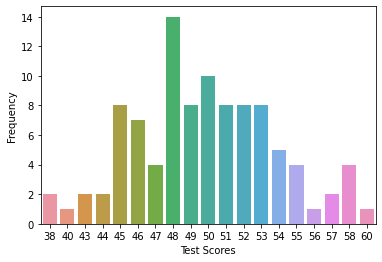

In [141]:
# plot the data as a barplot
plot = seaborn.barplot(x = "Test Scores", y = "Frequency", data = df)

In [142]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
    
SELECT country, first_name, last_name, test_score 
FROM INTERNATIONAL_STUDENT_TEST_SCORES
LIMIT 15;    

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


### Analyzing Data with Python

**Lab**: analyzing a real-world dataset with SQL and Python.

Find the details of this dataset [here](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01).

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.

In [143]:
# load the SQl extension and establish a connection with the database

#!pip install sqlalchemy
#!pip install ibm_db_sa
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [7]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name

# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://fgl32023:25q97r4n99-mt9x2@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

DB2/LINUXX8664


**Store the dataset in a Table**

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

We will first read the dataset source .CSV from the internet into pandas dataframe

Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table

In [9]:
# import pandas
import pandas

# load the data
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

In [10]:
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "END-OF-STATEMENT" was found following "o_socioeconomic_data".  Expected tokens may include:  "JOIN <joined_table>".  SQLSTATE=42601\r SQLCODE=-104
[SQL: PERSIST chicago_socioeconomic_data]
(Background on this error at: http://sqlalche.me/e/f405)


In [59]:
%sql SELECT * FROM chicago_socioeconomic_data LIMIT 5;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [60]:
# find how many rows are in the data set

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


In [61]:
# how many community areas in chicago have a hardship index over 50?

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index >50;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [63]:
# what is the maximum value of hardship index in this dataset?

%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


In [64]:
# which community has the highest hardship index?

# use previous result as an input to this query
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [152]:
# or order the search and fetch only the first row
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


community_area_name
Riverdale


In [153]:
# or use a sub-query
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


community_area_name
Riverdale


In [154]:
# which chicago communities have per-capita incomes over 60000?
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
   sqlite://
Done.


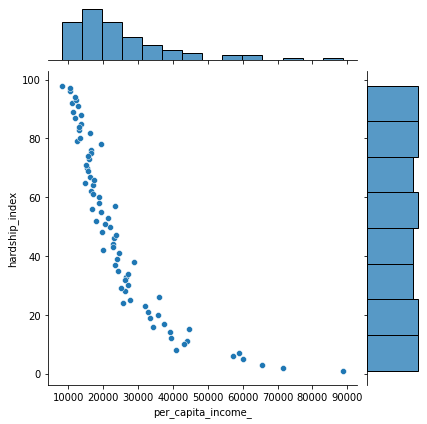

In [155]:
# create a scatter plot of per capita income and hardship index
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# get required data
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;

# plot the data in a jointplot
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

# as per capita income rises, the hardship index decreases
# there is a negative correlation between the two variables.

## *Week 5: Course Assignment.*

Created in a separate notebook.

### Tips when working in SQL from a .csv dataset 

Querying column names with mixed case:
- use double quotes to specify mixed-case column names in SQL

Querying column names with space and special characters:
- spaces (and other special characters) get mapped to underscores.

Using quotes in Jupyter:
- first assign queries to variables.
- Use backslash \ as the escape character in cases where the query contains single quotes

Splitting Queries into multiple lines in Jupyter:
- Use backslash \ to split the query into multiple lines for readability
- Or use SQL magic %%sql. 

Restricting the number of rows retrieved:
- You could get the data from SQL into a pandas dataframe to then use the .head() function, but doing so could take a long time to process depending on the size of the datset.
- Instead, use the SQL LIMIT clause to restrict the result set.

### Getting Table and Column Details

Getting a list of tables in a database:
- Db2:
    - SYSCAT.TABLES
    - *select * from SYSCAT.TABLES*
- SQL Server
    - INFORMATION_SCHEMA.TABLES
- Oracle
    - ALL_TABLES or USER_TABLES
    
Getting table properties:
- Db2: use SYSCAT.TABLES to pull table details such as table name and creation date from all tables you have created within the database.
    - *select TABSCEHMA, TABNAME, CREATE_TIME from syscat.tables where tabschema = 'yourusername'*

Getting a list of columns in a database:
- Db2: use SYSCAT.COLUMNS to pull column details from all tables, or specify which table by the table name / tabname.
    - *select * from syscat.columns where tabname = 'name'*
- MYSQL: use the command "SHOW COLUMNS FROM table_name"

Obtain specific colum properties:
- Db2: use sysibm.syscolumns
    - *select distinct(name), coltype, length from sysibm.syscolumsn where tbname = 'name'*

### Practice Lab

Working with real-world data set using SQl and Python

After completing this lab you will be able to:

*   Understand the dataset for Chicago Public School level performance
*   Store the dataset in an Db2 database on IBM Cloud instance
*   Retrieve metadata about tables and columns and query data from mixed case columns
*   Solve example problems to practice your SQL skills including using built-in database functions

<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01">Dataset link</a>.

In many cases, the dataset is available as a .CSV file. To analyze it with SQL, it first needs to be stored in the database.  

It is highly recommended to manually load the table using the database console LOAD tool, but it is also possible to read it into a pandas dataframe and then PERSIST it into the database (though this comes with some set backs).

The .CSV file has already been loaded into the Db2 database and is called SCHOOLS.

In [2]:
# load sql module
%load_ext sql

In [26]:
# Enter the connection string for your Db2 on Cloud database instance below
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
%sql ibm_db_sa://fgl32023:25q97r4n99-mt9x2@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

DB2/LINUXX8664


In [27]:
# verify that the table was successfully created by retrieving a list of all tables in your schema
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABNAME = 'SCHOOLS'

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,create_time
FGL32023,SCHOOLS,2021-07-07 16:32:12.427092


In [28]:
# retrieve the number of columns in the table
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


In [29]:
# retrieve the list of columns in the schools table and their column type
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


colname,typename,length
School_ID,INTEGER,4
NAME_OF_SCHOOL,VARCHAR,65
school_type,VARCHAR,2
Street_Address,VARCHAR,29
City,VARCHAR,7
State,VARCHAR,2
ZIP_Code,INTEGER,4
Phone_Number,VARCHAR,14
Link,VARCHAR,78
Network_Manager,VARCHAR,40


In [30]:
# another way to do the same thing
%sql select distinct(NAME), COLTYPE, LENGTH from SYSIBM.SYSCOLUMNS where TBNAME = 'SCHOOLS'

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name,coltype,length
10th Grade PLAN (2009),VARCHAR,4
10th Grade PLAN (2010),VARCHAR,4
11th Grade Average ACT (2011),VARCHAR,4
9th Grade EXPLORE (2009),VARCHAR,4
9th Grade EXPLORE (2010),VARCHAR,4
AVERAGE_STUDENT_ATTENDANCE,VARCHAR,6
Adequate_Yearly_Progress_Made_,VARCHAR,3
Average_Teacher_Attendance,VARCHAR,6
COLLEGE_ENROLLMENT,SMALLINT,2
COMMUNITY_AREA_NAME,VARCHAR,22


In [39]:
# how many elementary schools are in the dataset?
%sql select count(*) from SCHOOLS WHERE school_type = "ES"

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0206N  "SCHOOL_TYPE" is not valid in the context where it is used.  SQLSTATE=42703\r SQLCODE=-206
[SQL: select count(*) from SCHOOLS WHERE school_type = ES]
(Background on this error at: http://sqlalche.me/e/f405)


In [40]:
# what is the highest safety score?
%sql select MAX(SAFETY_SCORE) as MAX_SAFETY_SCORE from SCHOOLS

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


max_safety_score
99


In [44]:
# which schools have the highest safety score?
%sql select Name_of_School, Safety_Score from SCHOOLS where Safety_Score = 99

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [46]:
# another way
%sql select Name_of_School, Safety_Score from SCHOOLS where \
  Safety_Score= (select MAX(Safety_Score) from SCHOOLS)

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [47]:
# what are the top 10 schools with the highest Average Student Attendance
%sql select Name_of_School, Average_Student_Attendance from SCHOOLS \
    order by Average_student_Attendance DESC NULLS LAST LIMIT 10

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


In [48]:
# what are the bottom 5 schools for attendance?
%sql SELECT Name_of_School, Average_Student_Attendance \
    from SCHOOLS \
    order by Average_Student_Attendance \
    fetch first 5 rows only

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


In [49]:
# remove the % sign from the above set
%sql SELECT Name_of_School, REPLACE(Average_Student_Attendance, '%', '') \
     from SCHOOLS \
     order by Average_Student_Attendance \
     fetch first 5 rows only

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,2
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


In [50]:
# which schools have average attendance lower than 70%?
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from SCHOOLS \
     where DECIMAL ( REPLACE(Average_Student_Attendance, '%', '') ) < 70 \
     order by Average_Student_Attendance

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


In [51]:
# another way
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from SCHOOLS \
     where CAST ( REPLACE(Average_Student_Attendance, '%', '') AS DOUBLE ) < 70 \
     order by Average_Student_Attendance

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


In [52]:
# get the total college enrollment for each community area
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from SCHOOLS \
   group by Community_Area_Name 

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,total_enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


In [53]:
# get the 5 community areas with the least college enrollment in ascending order
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from SCHOOLS \
   group by Community_Area_Name \
   order by TOTAL_ENROLLMENT asc \
   fetch first 5 rows only

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,total_enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


In [55]:
# get 5 schools with the lowest safety score
%sql SELECT name_of_school, safety_score \
    FROM schools \
    ORDER BY safety_score \
    LIMIT 5

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Edmond Burke Elementary School,1
Luke O'Toole Elementary School,5
George W Tilton Elementary School,6
Foster Park Elementary School,11
Emil G Hirsch Metropolitan High School,13


Get the harship index for the community with college enrollment of 4368:

In [80]:
%%sql 
select hardship_index, community_area_number 
from chicago_socioeconomic_data CD, SCHOOLS CPS
where CD.CA = CPS.community_area_number
    AND college_enrollment = 4368


 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


hardship_index,community_area_number
6.0,5


In [69]:
%sql select ca, community_area_name, hardship_index from chicago_socioeconomic_data \
   where ca in \
   ( select community_area_number from schools order by college_enrollment desc limit 1 )

 * ibm_db_sa://fgl32023:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


ca,community_area_name,hardship_index
5.0,North Center,6.0


## *Week 6: Advanced SQL for Data Engineers*

### Views

Views:
- An alternative way of representing data that exists in one or more tables (or views).
- It can include specified columns from multiple base tables and existing views. 
- Once created, it can be queried like a table.
- You can also change the data in the base table by running insert, update, and delete queries against the view.
- When a view is defined, only the definition is stored - the data still remains in the base table(s).
- The select statement used to create the view can name other views and tables, as well as use the WHERE, GROUP BY, and HAVING clauses.
- It cannot use the ORDER BY clause or name a host variable.

When to use a view:
- When you need to show just a selection of data for a given data
- Combine two or more tables in meaningful ways
- Simplify access to data
- Show only portions of data in the table
- Use DROP VIEW view_name; to delete the view.

Syntax:

*CREATE VIEW view_name (col1_alias, col2_alias....*

    *coln_alias)*
    
    *AS SELECT col1, col2, ..., coln*
    
    *FROM table_name*
    
    *WHERE predicate;*

In [7]:
%%sql

CREATE VIEW EMPINFO (EMP_ID, FIRSTNAME, LASTNAME, ADDRESS, JOB_ID, MANAGER_ID, DEPT_ID)
    as select EMP_ID, F_NAME, L_NAME, ADDRESS, JOB_ID, MANAGER_ID, DEP_ID
    from EMPLOYEES;

 * sqlite://
Done.


[]

In [8]:
%%sql
select * from EMPINFO;

 * sqlite://
Done.


EMP_ID,FIRSTNAME,LASTNAME,ADDRESS,JOB_ID,MANAGER_ID,DEPT_ID
E1001,John,Thomas,"5631 Rice, OakPark,IL",100,30001,2
E1002,Alice,James,"980 Berry ln, Elgin,IL",200,30002,5
E1003,Steve,Wells,"291 Springs, Gary,IL",300,30002,5
E1004,Santosh,Kumar,"511 Aurora Av, Aurora,IL",400,30004,5
E1005,Ahmed,Hussain,"216 Oak Tree, Geneva,IL",500,30001,2
E1006,Nancy,Allen,"111 Green Pl, Elgin,IL",600,30001,2
E1007,Mary,Thomas,"100 Rose Pl, Gary,IL",650,30003,7
E1008,Bharath,Gupta,"145 Berry Ln, Naperville,IL",660,30003,7
E1009,Andrea,Jones,"120 Fall Creek, Gary,IL",234,30003,7
E1010,Ann,Jacob,"111 Britany Springs,Elgin,IL",220,30004,5


**Lab**: using views

Create the view:

In [17]:
%%sql

CREATE VIEW EMPSALARY AS
SELECT EMP_ID, F_NAME, L_NAME, B_DATE, SEX, SALARY
FROM EMPLOYEES;

 * sqlite://
Done.


[]

In [18]:
%%sql

select * from EMPSALARY;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,B_DATE,SEX,SALARY
E1001,John,Thomas,1/9/1976,M,100000
E1002,Alice,James,7/31/1972,F,80000
E1003,Steve,Wells,8/10/1980,M,50000
E1004,Santosh,Kumar,7/20/1985,M,60000
E1005,Ahmed,Hussain,1/4/1981,M,70000
E1006,Nancy,Allen,2/6/1978,F,90000
E1007,Mary,Thomas,5/5/1975,F,65000
E1008,Bharath,Gupta,5/6/1985,M,65000
E1009,Andrea,Jones,7/9/1990,F,70000
E1010,Ann,Jacob,3/30/1982,F,70000


Update the view by combining two tables (employees and jobs) and including more columns from both tables:

*NOTE: SQLite does not support the "CREATE OR REPLACE" syntax, so instead first drop the original view and create a new one.*

In [22]:
%%sql

DROP VIEW IF EXISTS [EMPSALARY];

CREATE VIEW EMPSALARY AS
SELECT EMP_ID, F_NAME, L_NAME, B_DATE, SEX, JOB_TITLE, MIN_SALARY, MAX_SALARY
FROM EMPLOYEES, JOBS
WHERE EMPLOYEES.JOB_ID = JOBS.JOB_IDENT;

 * sqlite://
Done.
Done.


[]

In [23]:
%%sql

select * from EMPSALARY;

 * sqlite://
Done.


EMP_ID,F_NAME,L_NAME,B_DATE,SEX,JOB_TITLE,MIN_SALARY,MAX_SALARY
E1001,John,Thomas,1/9/1976,M,Sr. Architect,60000,100000
E1002,Alice,James,7/31/1972,F,Sr. Software Developer,60000,80000
E1003,Steve,Wells,8/10/1980,M,Jr. Software Developer,40000,60000
E1004,Santosh,Kumar,7/20/1985,M,Jr. Software Developer,40000,60000
E1005,Ahmed,Hussain,1/4/1981,M,Jr. Architect,50000,70000
E1006,Nancy,Allen,2/6/1978,F,Lead Architect,70000,100000
E1007,Mary,Thomas,5/5/1975,F,Jr. Designer,60000,70000
E1008,Bharath,Gupta,5/6/1985,M,Jr. Designer,60000,70000
E1009,Andrea,Jones,7/9/1990,F,Sr. Designer,70000,90000
E1010,Ann,Jacob,3/30/1982,F,Sr. Designer,70000,90000


In [24]:
%%sql

DROP VIEW EMPSALARY;

 * sqlite://
Done.


[]

### Stored Procedures

Stored Procedure:
- A set of SQL statements stored and executed on the database server
    - write in many different languages
    - accept information in the form of parameters
    - perform CRUD operations
    - return results to the client
    
Benefits of stored procedures:
- Reduction in network traffic
- Improvement in performance
- Reuse of code
- Increase in security
    - you do not need to expose all of the table / column info to the client side developers
    - you can use server-side logic to validate data prior to accepting it into the system.
    
Call your stored procedures from:
- external applications
- dynamic SQL statements

SYNTAX:

*CREATE PROCEDURE procedure_name*

*LANGUAGE LANGUAGE_NAME*

*BEGIN*
    
    *procedure code here*
   
*END*


*Note that SQL is not a fully-fledged programming language, so you shouldn't try to write all your business logic in stored procedures.*

**lab**: working with stored procedures

Create a stored proecured called Retrieve all, which contains a SQL query to retrieve all records from the petsale table. You can then use this procedure to get all the data rather than writing out code every time.

*NOTE: SQLite does not have the functionality of stored procedures, so the below code won't function here.  But it is a stored procedure*.

In [ ]:
%%sql

--#SET TERMINATOR @
CREATE PROCEDURE RETRIEVE_ALL       -- Name of this stored procedure routine

LANGUAGE SQL                        -- Language used in this routine 
READS SQL DATA                      -- This routine will only read data from the table

DYNAMIC RESULT SETS 1               -- Maximum possible number of result-sets to be returned to the caller query

BEGIN 

    DECLARE C1 CURSOR               -- CURSOR C1 will handle the result-set by retrieving records row by row from the table
    WITH RETURN FOR                 -- This routine will return retrieved records as a result-set to the caller query
    
    SELECT * FROM PETSALE;          -- Query to retrieve all the records from the table
    
    OPEN C1;                        -- Keeping the CURSOR C1 open so that result-set can be returned to the caller query

END
@                                   -- Routine termination character

In [ ]:
%%sql

CALL RETRIEVE_ALL; -- Caller query

In [ ]:
%%sql

DROP PROCEDURE RETRIEVE_ALL;

Another example of a procedure:

In [ ]:
%%sql

--#SET TERMINATOR @
CREATE PROCEDURE UPDATE_SALEPRICE ( 
    IN Animal_ID INTEGER, IN Animal_Health VARCHAR(5) )     -- ( { IN/OUT type } { parameter-name } { data-type }, ... )

LANGUAGE SQL                                                -- Language used in this routine
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN 

    IF Animal_Health = 'BAD' THEN                           -- Start of conditional statement
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE - (SALEPRICE * 0.25)
        WHERE ID = Animal_ID;
    
    ELSEIF Animal_Health = 'WORSE' THEN
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE - (SALEPRICE * 0.5)
        WHERE ID = Animal_ID;
        
    ELSE
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE
        WHERE ID = Animal_ID;

    END IF;                                                 -- End of conditional statement
    
END
@                                                           -- Routine termination character

In [ ]:
%%sql 

CALL RETRIEVE_ALL;

CALL UPDATE_SALEPRICE(1, 'BAD');        -- Caller query

CALL RETRIEVE_ALL;

In [ ]:
%%sql 

CALL RETRIEVE_ALL;

CALL UPDATE_SALEPRICE(3, 'WORSE');      -- Caller query

CALL RETRIEVE_ALL;

In [ ]:
%%sql

DROP PROCEDURE UPDATE_SALEPRICE;

### ACID Transactions

ACID Transactions:
- A transaction is an indivisible unit of work, consisting of one or more SQL statements.
- To be considered successful, either all of the SQL statements must complete successfully, leaving the database in a new stable state, or none must complete, leaving the database as it was prior to the transaction.
- SQL statements can be called from languages like Java, C, R, and Python.
- This requires the use of database-specific access APIs, such as Java Database Connectivity (JDBC) for java or a specific database connector like IBM_DB for Python.
- Most languages use the EXEC SQL command to execute SQL statements from code.

A.C.I.D.:
- Atomic
    - all changes must be performed successfully or not at all
- Consistent
    - data must be in a consistent state before and after the transaction
- Isolated
    - no other process can change the data while the transaction is running
- Durable
    - The changes by the transaction must persist

ACID commands:
- BEGIN
    - start the acid transaction
- COMMIT
    - all statements complete successfully
    - save the new database state
- ROLLBACK
    - one or more statements fail
    - undo changes

**Lab**: committing and rolling back a transaction using a stored procedure.

In [32]:
%%sql

-- Drop the table in case it exists

DROP TABLE IF EXISTS BankAccounts;

-- Create the table

CREATE TABLE BankAccounts (
    AccountNumber VARCHAR(5) NOT NULL,
    AccountName VARCHAR(25) NOT NULL,
    Balance DECIMAL(8,2) CHECK(Balance>=0) NOT NULL,
    PRIMARY KEY (AccountNumber)
    );

-- Insert sample data into the table
    
INSERT INTO BankAccounts VALUES
('B001','Rose',300),
('B002','James',1345),
('B003','Shoe Shop',124200),
('B004','Corner Shop',76000);

-- Retrieve all records from the table

SELECT * FROM BankAccounts;

 * sqlite://
Done.
Done.
Done.
Done.


AccountNumber,AccountName,Balance
B001,Rose,300
B002,James,1345
B003,Shoe Shop,124200
B004,Corner Shop,76000


In [33]:
%%sql

-- Drop the table in case it exists

DROP TABLE IF EXISTS ShoeShop;

-- Create the table

CREATE TABLE ShoeShop (
    Product VARCHAR(25) NOT NULL,
    Stock INTEGER NOT NULL,
    Price DECIMAL(8,2) CHECK(Price>0) NOT NULL,
    PRIMARY KEY (Product)
    );

-- Insert sample data into the table
    
INSERT INTO ShoeShop VALUES
('Boots',11,200),
('High heels',8,600),
('Brogues',10,150),
('Trainers',14,300);

-- Retrieve all records from the table

SELECT * FROM ShoeShop;


 * sqlite://
Done.
Done.
Done.
Done.


Product,Stock,Price
Boots,11,200
High heels,8,600
Brogues,10,150
Trainers,14,300


Create a stored procedure that uses ACID transaction:

In [ ]:
%%sql

--#SET TERMINATOR @
CREATE PROCEDURE TRANSACTION_ROSE                           -- Name of this stored procedure routine

LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN

        DECLARE SQLCODE INTEGER DEFAULT 0;                  -- Host variable SQLCODE declared and assigned 0
        DECLARE retcode INTEGER DEFAULT 0;                  -- Local variable retcode with declared and assigned 0
        DECLARE CONTINUE HANDLER FOR SQLEXCEPTION           -- Handler tell the routine what to do when an error or warning occurs
        SET retcode = SQLCODE;                              -- Value of SQLCODE assigned to local variable retcode
        
        UPDATE BankAccounts
        SET Balance = Balance-200
        WHERE AccountName = 'Rose';
        
        UPDATE BankAccounts
        SET Balance = Balance+200
        WHERE AccountName = 'Shoe Shop';
        
        UPDATE ShoeShop
        SET Stock = Stock-1
        WHERE Product = 'Boots';
        
        UPDATE BankAccounts
        SET Balance = Balance-300
        WHERE AccountName = 'Rose';

        
        IF retcode < 0 THEN                                  --  SQLCODE returns negative value for error, zero for success, positive value for warning
            ROLLBACK WORK;
        
        ELSE
            COMMIT WORK;
        
        END IF;
        
END
@                                                            -- Routine termination character

In [ ]:
%%sql

CALL TRANSACTION_ROSE;  -- Caller query

SELECT * FROM BankAccounts;

SELECT * FROM ShoeShop;

In [ ]:
%%sql

--#SET TERMINATOR @
CREATE PROCEDURE TRANSACTION_JAMES                          -- Name of this stored procedure routine

LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN

        DECLARE SQLCODE INTEGER DEFAULT 0;                  -- Host variable SQLCODE declared and assigned 0
        DECLARE retcode INTEGER DEFAULT 0;                  -- Local variable retcode with declared and assigned 0
        DECLARE CONTINUE HANDLER FOR SQLEXCEPTION           -- Handler tell the routine what to do when an error or warning occurs
        SET retcode = SQLCODE;                              -- Value of SQLCODE assigned to local variable retcode
        
        UPDATE BankAccounts
        SET Balance = Balance-1200
        WHERE AccountName = 'James';
        
        UPDATE BankAccounts
        SET Balance = Balance+1200
        WHERE AccountName = 'Shoe Shop';
        
        UPDATE ShoeShop
        SET Stock = Stock-4
        WHERE Product = 'Trainers';
        
        UPDATE BankAccounts
        SET Balance = Balance-150
        WHERE AccountName = 'James';

        
        IF retcode < 0 THEN                                  --  SQLCODE returns negative value for error, zero for success, positive value for warning
            ROLLBACK WORK;
        
        ELSE
            COMMIT WORK;
        
        END IF;
        
END
@                                                            -- Routine termination character

### Joins

Join Operator:
- combines rows from two or more tables
- based on a relationship

Relational model:
- Primary Key: Uniquely identifies each row in a table
- Foreign Key: refers to a primary key of another table

Types of Joins:
- Inner Join
    - displays only the rows from both tables that have matching values in a common column, usually the primary key of one table that exists as a foreign key in another.
- Outer Join
    - Left Join
        - Fully combines the 'left' table with the columns it has in common with the 'right' table
    - Right Join
        - Fully combines the 'right' table with the columns it has in common with the 'left' table.
    - Full Outer Join
        - Fully combines all records in the joined tables.

### Inner Joins

Inner Join:
- This display rows that are matching in a common column between two or more tables only. 

-----
Syntax:

SELECT column_name(s)

FROM table1

INNER JOIN table2

ON table1.column_name = table2.column_name;

WHERE condition;

*NOTE: the table specified on the left of the join clause is known as the 'left table'.*

### Outer Joins

Outer Join:
- Left Join
    - Fully combines the 'left' table with the columns it has in common with the 'right' table
- Right Join
    - Fully combines the 'right' table with the columns it has in common with the 'left' table.
- Full Outer Join
    - Fully combines all records in the joined tables.
    
----
    
Left Join Syntax:

SELECT column_name(s)

FROM table1

LEFT OUTER JOIN table2

ON table1.column_name = table2.column_name

WHERE condition;

-----

Right Join Syntax:

SELECT column_name(s)

FROM table1

RIGHT OUTER JOIN table2

ON table1.column_name = table2.column_name

WHERE condition;

-----
Full Outer Join Syntax:

SELECT column_name(s)

FROM table1

FULL OUTER JOIN table2

ON table1.column_name = table2.column_name

WHERE condition;

### Cross Join

Cross Join:
- A cross join produces a result set which is the number of rows in table1 multiplied by the number of rows in table2 if no WHERE clause is used along with CROSS JOIN.  
- The result is called a cartesian product.  
- If no WHERE clause is used with CROSS JOIN, it functions like an INNER JOIN.

----

Syntax:

SELECT column_name(s)

FROM table1

CROSS JOIN table2;

### Self Join

Self Join:
- Allows for the joining of a table to itself.
- Useful for querying hierarchical data or comparing rows within the same table
- Because the self join query references the same table, a table alias is used to assign different names to the same table within the query.

-----

Syntax:

SELECT column_name(s)

FROM table1 T1, table1 T2

WHERE condition;

**Lab**: Using joins 

In [14]:
%%sql
-- select the names and job start dates of all employees who work for department 5

select E.F_NAME,E.L_NAME, JH.START_DATE 
from EMPLOYEES as E 
INNER JOIN JOB_HISTORY as JH on E.EMP_ID=JH.EMPL_ID 
where E.DEP_ID ='5';	

 * sqlite://
Done.


F_NAME,L_NAME,START_DATE
Alice,James,8/1/2001
Steve,Wells,8/16/2001
Santosh,Kumar,8/16/2000
Ann,Jacob,8/16/2016


In [15]:
%%sql
-- select names, job start date, job titles for all employees in department 5

select E.F_NAME,E.L_NAME, JH.START_DATE, J.JOB_TITLE 
from EMPLOYEES as E 
INNER JOIN JOB_HISTORY as JH on E.EMP_ID=JH.EMPL_ID 
INNER JOIN JOBS as J on E.JOB_ID=J.JOB_IDENT
where E.DEP_ID ='5';

 * sqlite://
Done.


F_NAME,L_NAME,START_DATE,JOB_TITLE
Alice,James,8/1/2001,Sr. Software Developer
Steve,Wells,8/16/2001,Jr. Software Developer
Santosh,Kumar,8/16/2000,Jr. Software Developer
Ann,Jacob,8/16/2016,Sr. Designer


In [16]:
%%sql
-- perform a left outer join on the employees and department tables
-- select employee id, last name, department id, and department name for all employees

select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
from EMPLOYEES AS E 
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP;

 * sqlite://
Done.


EMP_ID,L_NAME,DEP_ID,DEP_NAME
E1001,Thomas,2,Architect Group
E1002,James,5,Software Group
E1003,Wells,5,Software Group
E1004,Kumar,5,Software Group
E1005,Hussain,2,Architect Group
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team
E1008,Gupta,7,Design Team
E1009,Jones,7,Design Team
E1010,Jacob,5,Software Group


In [ ]:
%%sql
-- rewrite the previous query but limit the result set to include only the rows of employees born before 1980

select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
from EMPLOYEES AS E 
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP 
where YEAR(E.B_DATE) < 1980;

-- note that sqlite doesn't have a year function, so this code won't work in sqlite

In [ ]:
%%sql
-- perform a full join on employees and department tables
-- select first name, last name, department name of all employees

select E.F_NAME,E.L_NAME,D.DEP_NAME
from EMPLOYEES AS E 
FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP;

- note: right and full outer joins are not supported currently by SQLite.

In [ ]:
%%sql
-- rewrite the previous query but have the result set include all employee names, but department id and department names only for males.

select E.F_NAME,E.L_NAME,D.DEPT_ID_DEP, D.DEP_NAME
from EMPLOYEES AS E 
FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP AND E.SEX = 'M';